<a href="https://colab.research.google.com/github/paulminhdai/CS4650-BigDataAnalyticsandCloudComputing-S22/blob/main/CS4650_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracting keywords from COVID-19 news with Python
Using Python and NLP techniques we are able to extract keywords of more than 100k articles and publications of the new infectious disease caused by coronavirus (COVID-19).

The new Coronavirus — or now called COVID-19 — are affecting the whole world as a new infectious disease. From several news of different sources we are able to apply some NLP techniques and frameworks.

In this article we going to extract the keywords of each article and create a dataset to use a function that applies the concept of POS tagging to identify keywords.

We will use spaCy and the News API, a great data source for search and retrieve live articles from all over the web. There will be some sections in this article:

###Setup — Google Colab
We will install the spaCy using pip and I will use the English Language Model.
The News API also have a Python library and we can install with pip.

In [ ]:
!pip install spacy
!pip install newsapi-python

Download the spaCy English Language Model in it’s largest size.

In [ ]:
!python -m spacy download en_core_web_lg

After installation you need to import the spaCy library and we going to use another libraries to help the implementation of the NLP analysis. We will also have to import the spaCy model and load it through a variable that we going to call nlp_eng.

In [54]:
import spacy 
from newsapi import NewsApiClient
import en_core_web_lg

an API Key can be created for free at https://newsapi.org/docs

In [55]:
nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='12c41715c9b74604b38b9ed6de99a082')

###Coding
The News API provide an easy way to research through a lot of different sources of articles and publications. When we send and HTTP Request, the API returns as much as 100 articles for maximum — you have to pay the dev account to get the total of results.

These articles are divided into pages and each page have 20 articles. So we go through 5 pages to get the total of 100 articles for free. We also have a limitation on the maximum search date in the past which is 30 days.

In [56]:
articles = []
for i in range(1,6):
  temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-22', to='2022-03-22', sort_by='relevancy', page=i)
  articles += temp['articles']

I used the Pickle library to save all the articles.

In [57]:
import pickle

We can create and save the .pckl file using these commands:

In [21]:
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

We handle the data and transform the dictionary of articles in a Pandas DataFrame.

In [23]:
import pandas as pd

The original JSON that we get from News API is very rich and we can clean it to use only the title, date, description and content.

In [58]:
dados = []
for i, article in enumerate(articles):
  title = article['title']
  description = article['description']
  content = article['content']
  date = article['publishedAt']
  dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()


,title,date,desc,content
0,"Rabbi Chaim Kanievsky, Venerated Talmudic Scho...",2022-03-18T20:26:55Z,"He initially insisted, “Canceling Torah study ...",Most significant was his ruling that instances...
1,Can Eric Adams Cheerlead New Yorkers Past the ...,2022-03-20T16:11:17Z,The mayor is singularly focused on bringing ba...,"Mr. Adams, a Democrat, has had regular convers..."
2,"Preschoolers Can Shed Their Masks, Mayor Adams...",2022-03-22T18:11:14Z,New York City plans to end the mask requiremen...,"Earlier this month, when Mr. Adams eliminated ..."
3,Moderna Asks F.D.A. to Authorize a Second Boos...,2022-03-18T09:08:37Z,The request is significantly broader than the ...,A man receiving a second booster of a coronavi...
4,China Reports Its First Covid Deaths in Over a...,2022-03-19T13:37:04Z,The two fatalities are the first coronavirus d...,Scarcely two months after the Omicron variant ...


Create a function called get_keywords_eng that will receive the text and will handle with the spaCy model to identify the Part-of-speech tagging that match with the keywords of our news.

We will extract the verbs (VERB), a nouns (NOUN) and proper nouns (PROPN).

In [59]:
def get_keywords_eng(contain):
  result = []
  pos_tag = ['NOUN','VERB','PROPN']
  punctuation = ['PUNCT']

  doc = nlp_eng(contain)
  for token in doc:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  return result

In [60]:
from collections import Counter

We add a new column inside our DataFrame called keywords to receive the result of the function. We only get the most 5 common words in each contain.

In [61]:
results = []
for content in df.content.values:
    results.append([x[0] for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

 save it again into our .pckl file.

In [62]:
filename = 'articlesCOVID.pckl'
pickle.dump(df, open(filename, 'wb'))

###Conclusion
Now that we have a dataset with the 5 most common keywords of each article concatenate with another several articles regarding the COVID-19, it’s time to choose the best way of show our results. I’ve choose a WordCloud, a picture that show the words of a text according to it’s frequency.

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

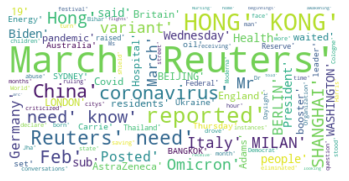

In [52]:
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()